<h1 style="text-align: center; color: blue">Customer Segmentation through Clustering</h1>

<img src="https://www.zimnat.co.zw/wp-content/uploads/2018/11/kyc-badge.png" style="display: block; margin: auto; width: 50%;" height="400" title= "Customer Segmentation through Clustering">

## 1.Libraries

In [1853]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2.Exploring and preparing the data

### 2.1 Import data

In [1854]:
data = open('Year 2010-2011.csv',"r")
data

<_io.TextIOWrapper name='Year 2010-2011.csv' mode='r' encoding='cp1252'>

In [1855]:
df = pd.read_csv('Year 2010-2011.csv', encoding='cp1252')

### 2.2 Cleaning and Pre-processing

In [1856]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470962,576618,23345,DOLLY GIRL BEAKER,1,11/15/2011 17:00,2.46,NaN,United Kingdom
122599,546884,22361,GLASS JAR DAISY FRESH COTTON WOOL,2,3/17/2011 18:08,5.79,NaN,United Kingdom
264743,560117,22902,TOTE BAG I LOVE LONDON,1,7/15/2011 10:14,2.10,NaN,United Kingdom
32445,539075,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,12/15/2010 17:28,3.75,17189.0,United Kingdom
75960,542617,84879,ASSORTED COLOUR BIRD ORNAMENT,8,1/30/2011 15:48,1.69,17463.0,United Kingdom
154758,549943,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,4/13/2011 12:09,2.95,13544.0,United Kingdom
411141,572194,22115,METAL SIGN EMPIRE TEA,1,10/21/2011 11:43,0.79,17832.0,United Kingdom
156314,550129,22291,HANGING CHICK CREAM DECORATION,24,4/14/2011 13:17,1.45,13001.0,United Kingdom
115655,546136,22379,RECYCLING BAG RETROSPOT,1,3/9/2011 16:32,4.13,NaN,United Kingdom
393535,570830,22349,DOG BOWL CHASING BALL DESIGN,6,10/12/2011 13:20,3.75,14852.0,United Kingdom


In [1857]:
# calculate number of rows and columns
df.shape

(541910, 8)

In [1858]:
# data informtions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### 2.2.1 Check if there are negative values

In [1859]:
# Count the number of negative values in each column
negative_counts = (df.loc[:, ['Quantity', 'Price']] < 0).sum()

# Print the counts
print(negative_counts)

Quantity    10624
Price           2
dtype: int64


#### 2.2.2 Check if there are duplications

In [1860]:
# check number of duplications
print(df.duplicated().loc[lambda x : x == True].count())

5268


In [1861]:
# Find the duplicated rows
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
duplicated_rows.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,12/1/2010 11:49,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,12/1/2010 11:49,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,12/1/2010 11:49,3.75,17920.0,United Kingdom


#### 2.2.3 Check missing values

In [1862]:
# calculate number of missing values
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

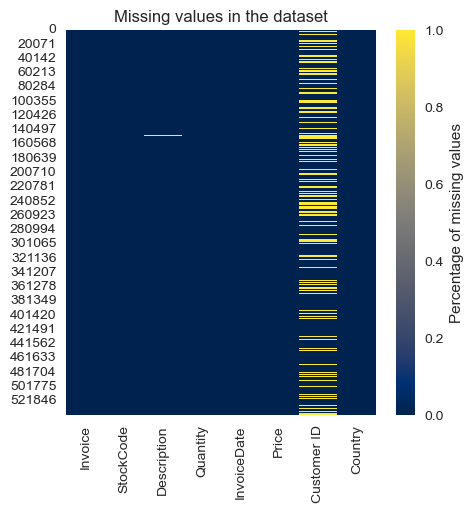

In [1863]:
# Create a boolean mask indicating which values are missing
mask = df.isnull()

# Create the heatmap visualization
sb.heatmap(mask, cmap= 'cividis', cbar_kws={'label': 'Percentage of missing values'})

# Add a grid to the plot
plt.grid(True)

# Add a title
plt.title('Missing values in the dataset')

# Show the plot
plt.show()

#### 2.2.4 Since we are doing customer segmentation, any missing Customer ID value should be eliminated.
- Missing values in the Description are eliminated when the missing values of the Customer ID are removed.

In [1864]:
# Drop the records with missing values in the 'Customer ID' column
df = df.dropna(subset=['Customer ID'])

#### 2.2.5 Remove negative values from Price and Quantity

In [1865]:
# Remove negative values from the 'Price' and 'Quantity' columns
df = df[df['Price'] >= 0]
df = df[df['Quantity'] > 0]

#### 2.2.6 Check the uniqueness of Descirption and StockCode columns

In [1866]:
# Unique number of Description
print("Unique number of Description: \b",df.Description.nunique())

# Unique Number of StockCode
print("Unique number of StockCode: \b",df.StockCode.nunique())

Unique number of Description: 3877
Unique number of StockCode: 3665


- The unique values of Description and StockCode should be equal since each StockCode represents a Description

In [1867]:
item = df[["Description","StockCode"]].drop_duplicates()
item = item.groupby(["Description"]).agg({"StockCode":"count"}).reset_index()

item.rename(columns={'StockCode':'Count_StockCode'},inplace=True)
item.head()

,Description,Count_StockCode
0,4 PURPLE FLOCK DINNER CANDLES,1
1,50'S CHRISTMAS GIFT BAG LARGE,1
2,DOLLY GIRL BEAKER,1
3,I LOVE LONDON MINI BACKPACK,1
4,I LOVE LONDON MINI RUCKSACK,1


In [1868]:
item = item.sort_values("Count_StockCode", ascending=False)
item = item[item["Count_StockCode"]>1]

item.head()

,Description,Count_StockCode
2014,"METAL SIGN,CUPCAKE SINGLE HOOK",3
2471,PINK FLOWERS RABBIT EASTER,2
1077,EAU DE NILE JEWELLED PHOTOFRAME,2
2460,PINK FAIRY CAKE CUSHION COVER,2
3678,WHITE BAMBOO RIBS LAMPSHADE,2


- Eliminating items that have several StockCode

In [1869]:
df = df[~df["Description"].isin(item["Description"])]

print(df.StockCode.nunique())
print(df.Description.nunique())

3630
3858


In [1870]:
item = df[["Description","StockCode"]].drop_duplicates()
item = item.groupby(["StockCode"]).agg({"Description":"count"}).reset_index()
item.rename(columns={'Description':'Description_Count'},inplace=True)
item = item.sort_values("Description_Count", ascending=False)
item = item[item["Description_Count"] > 1] 

item.tail()

,StockCode,Description_Count
1020,22129,2
1861,23028,2
1970,23145,2
1973,23148,2
1953,23128,2


- Eliminating StockCode that belong to several items

In [1871]:
df = df[~df["StockCode"].isin(item["StockCode"])]

print(df.StockCode.nunique())
print(df.Description.nunique())

3420
3420


- Add Total Amount column by multiplying Price by Quantity

In [1872]:
df['Total Amount'] = df['Price'] * df['Quantity']
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85
541909,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France,18.00


### 2.3 Data Analysis

#### 2.3.1 Checking which country has the highest ratio of customers

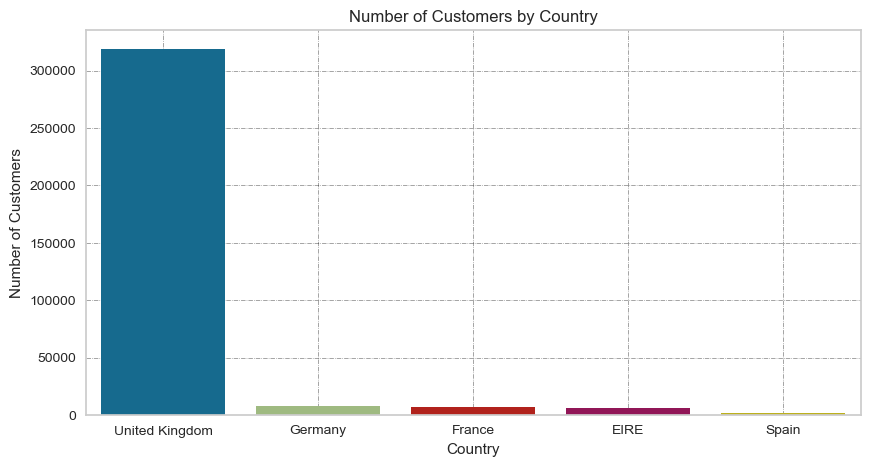

In [1873]:
# count the number of customers in each country
customer_counts = df['Country'].value_counts()

# select the top 5 countries
top_countries = customer_counts.head(5)

# create the figure with specific size
plt.figure(figsize=(10, 5))

# plot a bar chart
sb.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Country')
plt.grid(color = "black", linewidth = "0.5", linestyle = "-.", alpha=0.5);
plt.show()

#### As we can see that United Kingdom is having the highest number of customers, so we decided to analyse everything related to this country.

In [1874]:
df = df[df.Country == "United Kingdom"]

#### 2.3.2 Checking the most popular item (based on quantity sold)

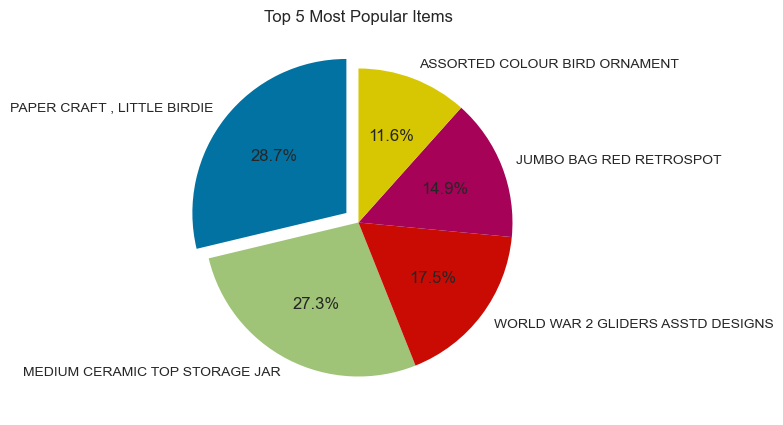

In [1875]:
# Get the top 5 most popular items
top_items = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

# Create a pie chart
plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=90, explode=[0.1, 0, 0, 0, 0])

# Add a title
plt.title('Top 5 Most Popular Items')

# Show the plot
plt.show()

#### 2.3.3 Checking which year has the most Total Amount of sales

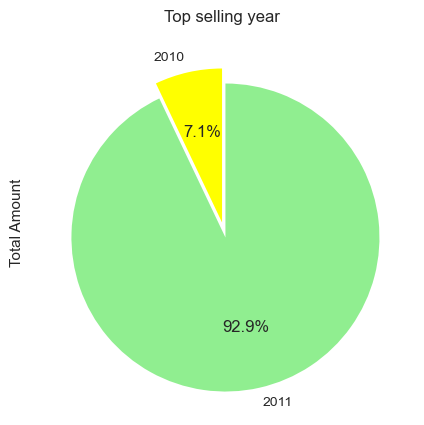

In [1876]:
# Convert the InvoiceDate column to a datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the year and month from the 'InvoiceDate' column
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x: x.strftime('%m'))
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

# Get the number of sales for each year
sales_by_year = df.groupby('Year')['Total Amount'].sum()

# Add a title
plt.title('Top selling year')

# Plot the number of sales for each year as a pie chart
sales_by_year.plot.pie(autopct='%1.1f%%', startangle=90, colors=['yellow','lightgreen'], explode=[0, 0.1]);


#### 2.3.4 Checking the highest Total Amount of sales per month

In [1877]:
sales_by_month = df.groupby('Year_Month')['Total Amount'].sum().head(5)
sales_by_month = sales_by_month.reset_index()
sales_by_month

,Year_Month,Total Amount
0,2010-12,455770.400
1,2011-01,396712.670
2,2011-02,325781.830
3,2011-03,431189.440
4,2011-04,368477.131


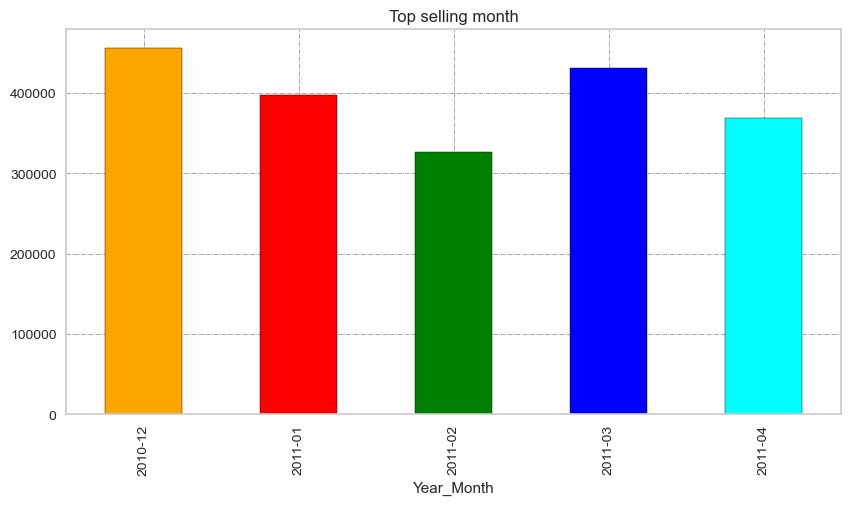

In [1878]:
# Get the number of sales for each year
sales_by_month = df.groupby('Year_Month')['Total Amount'].sum().head(5)

# create the figure with specific size
plt.figure(figsize=(10, 5))

# Add a title
plt.title('Top selling month')

# Add grid
plt.grid(color = "black", linewidth = "0.5", linestyle = "-.", alpha=0.5)

# Plot the number of sales for each year as a pie chart
sales_by_month.plot(kind='bar', edgecolor='black', color=['orange', 'red', 'green', 'blue', 'cyan'])

# Add grid
plt.grid(color = "black", linewidth = "0.5", linestyle = "-.", alpha=0.5);

### 2.4 Data Preparation

#### 2.4.1 Customer Consumption based on Recency, Frequency and Monetary (RFM)
- The recency value is calculated by taking the maximum InvoiceDate for each customer and subtracting it from a fixed date in the future (2012-01-01 in this case because the maximum date in the dataset is in 2011).
- The frequency value is calculated by counting the number of invoices for each customer.
- The monetary value is calculated by summing the Total Amount for each customer.

In [1879]:
# Calculate the recency, frequency, and monetary values for each customer
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (pd.Timestamp('2012-01-01') - x.max()).days,
    'Invoice': lambda x: len(x),
    'Total Amount': lambda x: x.sum()
})

# Rename the columns to Recency, Frequency, and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Total Amount': 'Monetary'}, inplace=True)

# Print the RFM values
rfm_df.head(10)

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,347,1,77183.60
12747.0,24,91,3960.63
12748.0,22,4238,30761.51
12749.0,25,173,3535.47
12820.0,25,47,734.22
12821.0,236,4,62.60
12822.0,92,42,884.18
12823.0,96,5,1759.50
12824.0,81,20,324.84


#### 2.4.2 Checking Outliers

In [1880]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3908.000000,3908.000000,3908.000000
mean,113.377431,81.638178,1650.758264
std,99.251832,198.854676,6791.712490
min,22.000000,1.000000,0.000000
25%,39.000000,15.000000,258.822500
50%,72.000000,37.000000,583.515000
75%,163.000000,91.000000,1401.320000
max,395.000000,7150.000000,233756.270000


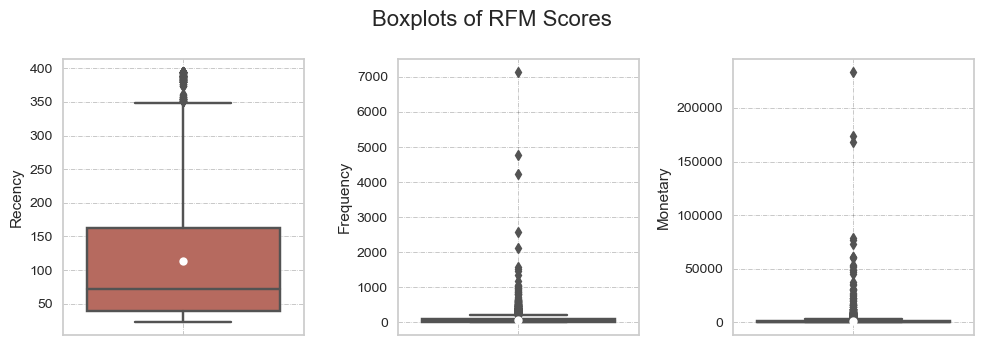

In [1881]:
# create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3.5), tight_layout= True)

# iterate over columns and create a boxplot on each subplot
for i, ax in enumerate(axs):
    sb.boxplot(y=rfm_df.columns[i], data=rfm_df, showmeans=True, orient='v', color='#E24A33',
                meanprops= {"marker": "o", "markerfacecolor": "white"}, saturation=0.5, ax=ax)
    # add grid to each subplot
    ax.grid(True, color = "black", linewidth = "0.5", linestyle = "-.",alpha=0.3)

# give figure a title
plt.suptitle("Boxplots of RFM Scores", fontsize=16)

# show plot
plt.show()

#### 2.4.3 Removing Outliers

In [1882]:
quantile_1 = rfm_df.quantile(0.25)
quantile_3 = rfm_df.quantile(0.75)
IQR = quantile_3 - quantile_1

rfm_df[(rfm_df < (quantile_1 - 1.5 * IQR)).any(axis=1)] = quantile_1
rfm_df[(rfm_df > (quantile_3 + 1.5 * IQR)).any(axis=1)] = quantile_3

# Generate summary statistics
rfm_df.describe()

,Recency,Frequency,Monetary
count,3908.000000,3908.000000,3908.000000
mean,121.147646,53.807318,835.745746
std,83.265549,43.060323,655.982529
min,22.000000,1.000000,0.000000
25%,48.000000,17.000000,281.262500
50%,97.000000,41.000000,632.335000
75%,163.000000,91.000000,1401.320000
max,348.000000,205.000000,3105.130000


##### 2.4.3.1 Checking Outliers after cleaning

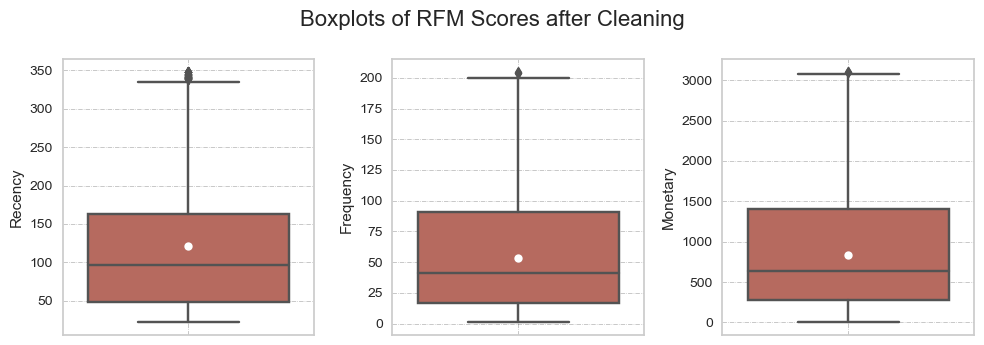

In [1883]:
# create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3.5), tight_layout= True)

# iterate over columns and create a boxplot on each subplot
for i, ax in enumerate(axs):
    sb.boxplot(y=rfm_df.columns[i], data=rfm_df, showmeans=True, orient='v', color='#E24A33',
                meanprops= {"marker": "o", "markerfacecolor": "white"}, saturation=0.5, ax=ax)
    # add grid to each subplot
    ax.grid(True, color = "black", linewidth = "0.5", linestyle = "-.",alpha=0.3)

# give figure a title
plt.suptitle("Boxplots of RFM Scores after Cleaning", fontsize=16)

# show plot
plt.show()

#### 2.4.4 Scaling and Normalization

In [1884]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(rfm_df)

# Transform the data
rfm_scaled = scaler.transform(rfm_df)

# Convert the scaled data back into a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_df.columns)
rfm_scaled_df.head(10)

,Recency,Frequency,Monetary
0,0.432515,0.441176,0.451292
1,0.432515,0.441176,0.451292
2,0.432515,0.441176,0.451292
3,0.432515,0.441176,0.451292
4,0.009202,0.225490,0.236454
5,0.656442,0.014706,0.020160
6,0.214724,0.200980,0.284748
7,0.226994,0.019608,0.566643
8,0.180982,0.093137,0.104614
9,0.006135,0.406863,0.433161


#### 2.4.5 RFM Quantiles

In [1885]:
# Generating quantiles from RFM data frame
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

# function to derive R, F, and M scores.
def R_Score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FM_Score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Create new columns in the rfm_df DataFrame with the quantile values
rfm_df['Recency_Quartile'] = rfm_df['Recency'].apply(R_Score, args=('Recency',quantiles))
rfm_df['Frequency_Quartile'] = rfm_df['Frequency'].apply(FM_Score, args=('Frequency',quantiles))
rfm_df['Monetary_Quartile'] = rfm_df['Monetary'].apply(FM_Score, args=('Monetary',quantiles))

# Create a new column for RFM scores
rfm_df['RFM_Score'] = rfm_df['Recency_Quartile'] + rfm_df['Frequency_Quartile'] + rfm_df['Monetary_Quartile']

rfm_df.head(10)

,Recency,Frequency,Monetary,Recency_Quartile,Frequency_Quartile,Monetary_Quartile,RFM_Score
Customer ID,,,,,,,
12346.0,163,91,1401.32,3,2,2,7
12747.0,163,91,1401.32,3,2,2,7
12748.0,163,91,1401.32,3,2,2,7
12749.0,163,91,1401.32,3,2,2,7
12820.0,25,47,734.22,1,2,2,5
12821.0,236,4,62.60,4,4,4,12
12822.0,92,42,884.18,2,2,2,6
12823.0,96,5,1759.50,2,4,1,7
12824.0,81,20,324.84,2,3,3,8


#### 2.4.5 RFM Segmentation

In [1886]:
# Assign a RFM group based on RFM score thresholds
def rfm_segment(row):
    if 3 <= row['RFM_Score'] <= 4:
        return 'Best Customers'
    elif 5 <= row['RFM_Score'] <= 6:
        return 'Loyal Customers'
    elif 7 <= row['RFM_Score'] <= 8:
        return 'Potential Loyalists'
    elif 9 <= row['RFM_Score'] <= 10:
        return 'Recent Customers'     
    elif 11 <= row['RFM_Score'] <= 12:
        return 'Lost Customers'

rfm_df['RFM_Segment'] = rfm_df.apply(rfm_segment, axis=1)

# create mapping for string labels to numerical values
segment_mapping = {'Best Customers': 1, 'Loyal Customers': 2, 'Potential Loyalists': 3, 'Recent Customers': 4, 'Lost Customers': 5}

# map segments to numerical values
rfm_df['RFM_Segment_Num'] = rfm_df['RFM_Segment'].map(segment_mapping)

# View the RFM segments for each customer
rfm_df[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'RFM_Segment']].sample(10)

,Recency,Frequency,Monetary,RFM_Score,RFM_Segment
Customer ID,,,,,
15712.0,31,47,964.86,5,Loyal Customers
15528.0,276,26,229.33,11,Lost Customers
16210.0,163,91,1401.32,7,Potential Loyalists
14733.0,163,91,1401.32,7,Potential Loyalists
12833.0,167,22,392.18,10,Recent Customers
17174.0,239,4,59.90,12,Lost Customers
17639.0,298,7,108.50,12,Lost Customers
15912.0,200,18,259.52,11,Lost Customers
18099.0,149,18,164.91,10,Recent Customers


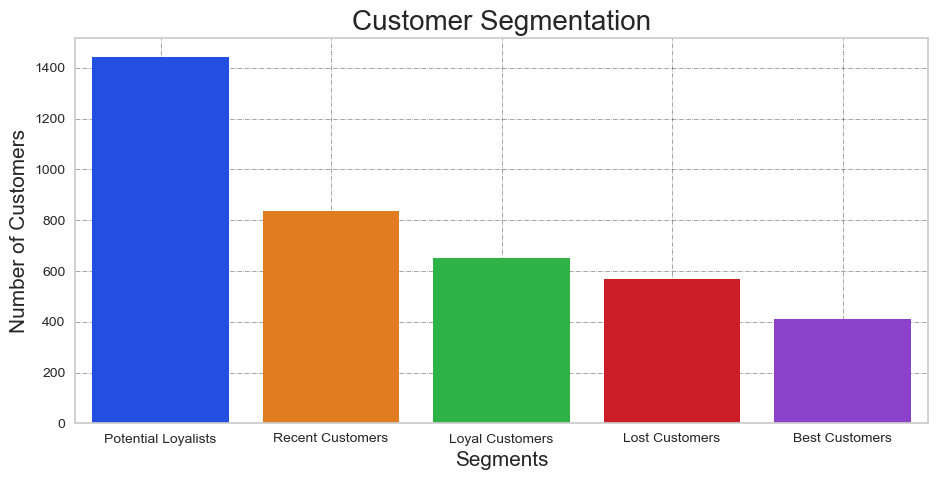

In [1887]:
# Count the number of customers in each RFM segment
segment_counts = rfm_df['RFM_Segment'].value_counts()

plt.figure(figsize=(11,5))

# Plot the data as a bar chart
sb.barplot(segment_counts.index, segment_counts.values, palette='bright')
plt.title('Customer Segmentation', size= 20, )
plt.xlabel('Segments', size= 15)
plt.ylabel('Number of Customers', size= 15)
plt.grid(color = "black", linewidth = "0.5", linestyle = "-.", alpha=0.5)
plt.show()

## 3.Models

### 3.1 K-Means

#### 3.1.1 Elbow Method for 'k'

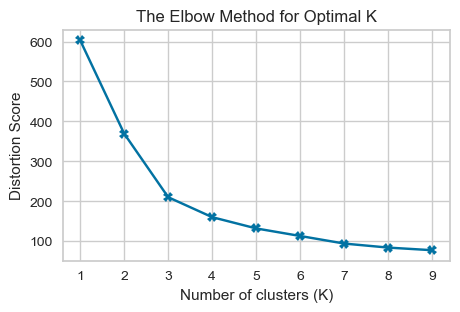

In [1888]:
distortion = []
K = range(1, 10)
for k in K:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(np.asarray(rfm_scaled_df))
    distortion.append(k_mean.inertia_)

plt.figure(figsize=(5,3))
plt.plot(K, distortion, '-X')

plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion Score')
plt.title('The Elbow Method for Optimal K')
plt.grid(True)

plt.show()

#### 3.1.2 Create Model

In [1889]:
# Create K-Mean clustering
K_mean = KMeans(n_clusters=4).fit(rfm_scaled_df)

#### 3.1.3 Predict

In [1890]:
# Store segments predicted by K-Mean
km_segments = K_mean.predict(rfm_scaled_df)

#### 3.1.4 Plot

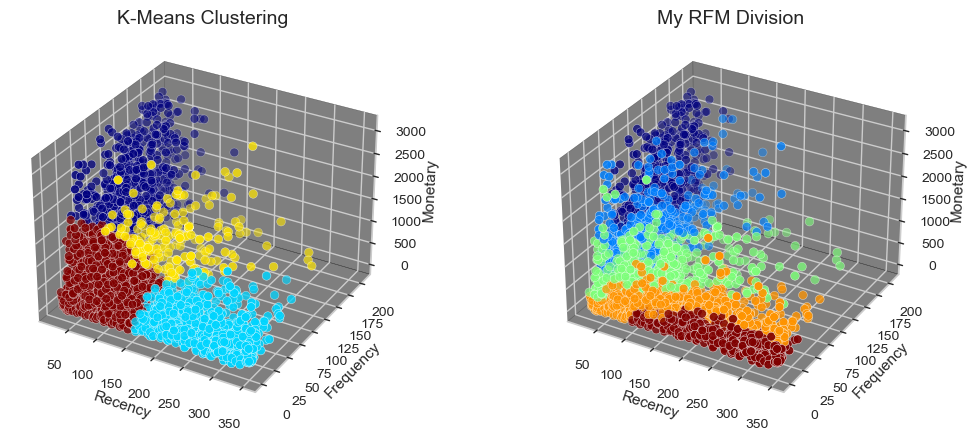

In [1891]:
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c=km_segments.astype(np.float),
           edgecolor="w",
           s=40,
           cmap= cm.get_cmap('jet'))

# Set the background color of the 3D plot
ax.get_xaxis().set_pane_color((0,0,0,0.5))
ax.get_yaxis().set_pane_color((0,0,0,0.5))
ax.get_zaxis().set_pane_color((0,0,0,0.5))

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("K-Means Clustering", fontsize=14)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c=rfm_df['RFM_Segment_Num'],
           edgecolor="w",
           s=40,
           cmap= cm.get_cmap('jet'))

# Set the background color of the 3D plot
ax.get_xaxis().set_pane_color((0,0,0,0.5))
ax.get_yaxis().set_pane_color((0,0,0,0.5))
ax.get_zaxis().set_pane_color((0,0,0,0.5))

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("My RFM Division", fontsize=14)
plt.show()

### 3.2 Hierarchical

#### 3.2.1 Dendrogram Cutting Method

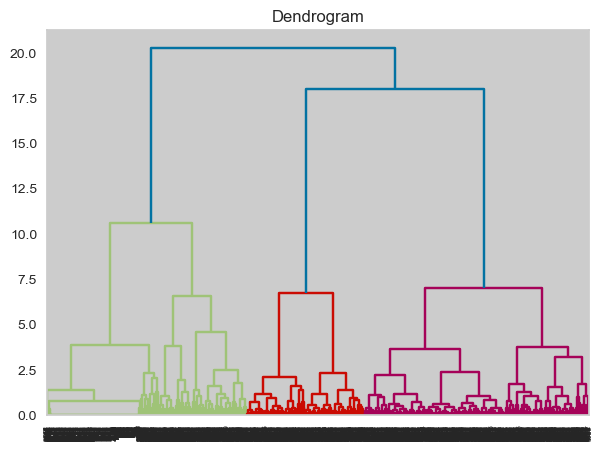

In [1892]:
# apply dendograms to find the best numbers of clusters
plt.figure(figsize=(7, 5))
plt.title("Dendrogram")
dendogram = shc.dendrogram(shc.linkage(rfm_scaled_df, method='ward'))
plt.show()

#### 3.2.2 Create Model

In [1893]:
# Create Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(rfm_scaled_df)

#### 3.2.3 Predict

In [1894]:
# Store segments predicted by Hierarchical
hierarchical_segments = hierarchical.fit_predict(rfm_scaled_df)

#### 3.2.4 Plot

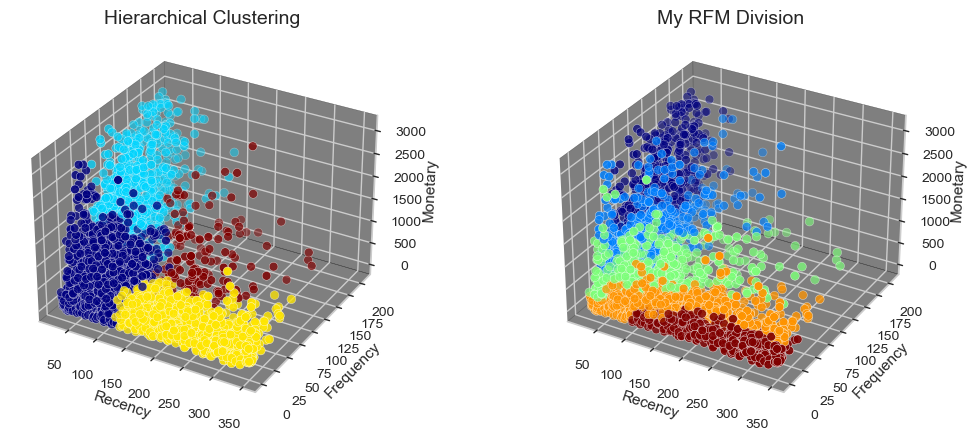

In [1895]:
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c= hierarchical_segments.astype(np.float),
           edgecolor="w",
           s=40,
           cmap= cm.get_cmap('jet'))

# Set the background color of the 3D plot
ax.get_xaxis().set_pane_color((0,0,0,0.5))
ax.get_yaxis().set_pane_color((0,0,0,0.5))
ax.get_zaxis().set_pane_color((0,0,0,0.5))

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("Hierarchical Clustering", fontsize=14)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c=rfm_df['RFM_Segment_Num'],
           edgecolor="w",
           s=40,
           cmap= cm.get_cmap('jet'))

# Set the background color of the 3D plot
ax.get_xaxis().set_pane_color((0,0,0,0.5))
ax.get_yaxis().set_pane_color((0,0,0,0.5))
ax.get_zaxis().set_pane_color((0,0,0,0.5))


ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("My RFM Division", fontsize=14)

plt.show()

### 3.3 BIRCH

#### 3.3.1 Create Model

In [1896]:
# Create BIRCH clustering
birch = Birch(branching_factor=50, n_clusters=4, threshold=0.01).fit(rfm_scaled_df)

#### 3.3.2 Predict

In [1897]:
# Store segments predicted by BIRCH
birch_segments = birch.fit_predict(rfm_scaled_df)

#### 3.3.3 Plot

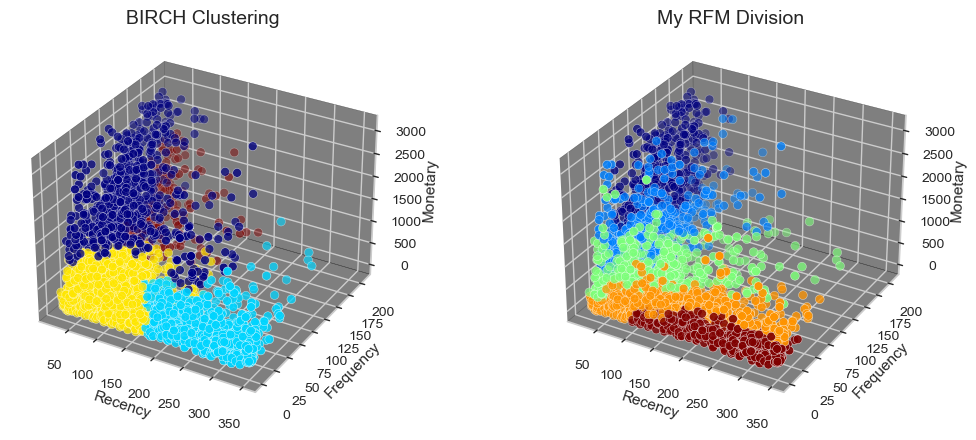

In [1898]:
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c= birch_segments.astype(np.float),
           edgecolor="w",
           s=40,
           cmap= cm.get_cmap('jet'))

# Set the background color of the 3D plot
ax.get_xaxis().set_pane_color((0,0,0,0.5))
ax.get_yaxis().set_pane_color((0,0,0,0.5))
ax.get_zaxis().set_pane_color((0,0,0,0.5))

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("BIRCH Clustering", fontsize=14)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],
           c=rfm_df['RFM_Segment_Num'],
           edgecolor="w",
           s=40,
           cmap= cm.get_cmap('jet'))

# Set the background color of the 3D plot
ax.get_xaxis().set_pane_color((0,0,0,0.5))
ax.get_yaxis().set_pane_color((0,0,0,0.5))
ax.get_zaxis().set_pane_color((0,0,0,0.5))


ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.title("My RFM Division", fontsize=14)

plt.show()

## 4.Evaluation

### 4.1 Silhouette Score, Davies-Bouldin and Calinski-Harabasz

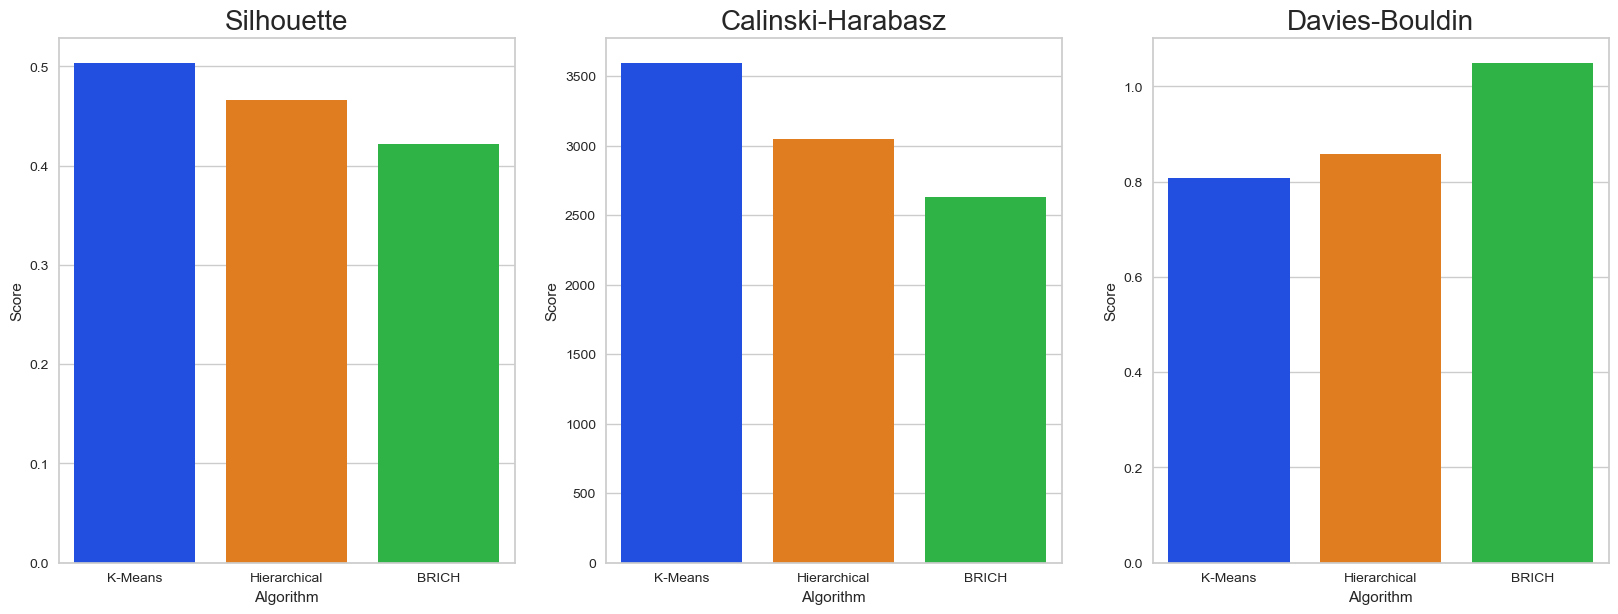

In [1899]:
df_results = pd.DataFrame(columns=['Metrics', 'Algorithm', 'Score'])

df_results = df_results.append({'Metrics':'Silhouette', 'Algorithm': 'K-Means', 
                                'Score': silhouette_score(rfm_scaled_df, km_segments)}, ignore_index=True)
df_results = df_results.append({'Metrics':'Silhouette', 'Algorithm': 'Hierarchical', 
                                'Score': silhouette_score(rfm_scaled_df, hierarchical_segments)}, ignore_index=True)
df_results = df_results.append({'Metrics':'Silhouette', 'Algorithm': 'BRICH', 
                                'Score': silhouette_score(rfm_scaled_df, birch_segments)}, ignore_index=True)

df_results = df_results.append({'Metrics':'Davies-Bouldin', 'Algorithm': 'K-Means', 
                                'Score': davies_bouldin_score(rfm_scaled_df, km_segments)}, ignore_index=True)
df_results = df_results.append({'Metrics':'Davies-Bouldin', 'Algorithm': 'Hierarchical', 
                                'Score': davies_bouldin_score(rfm_scaled_df, hierarchical_segments)}, ignore_index=True)
df_results = df_results.append({'Metrics':'Davies-Bouldin', 'Algorithm': 'BRICH', 
                                'Score': davies_bouldin_score(rfm_scaled_df, birch_segments)}, ignore_index=True)
                                
df_results = df_results.append({'Metrics':'Calinski-Harabasz', 'Algorithm': 'K-Means', 
                                'Score': calinski_harabasz_score(rfm_scaled_df, km_segments)}, ignore_index=True)
df_results = df_results.append({'Metrics':'Calinski-Harabasz', 'Algorithm': 'Hierarchical', 
                                'Score': calinski_harabasz_score(rfm_scaled_df, hierarchical_segments)}, ignore_index=True)
df_results = df_results.append({'Metrics':'Calinski-Harabasz', 'Algorithm': 'BRICH', 
                                'Score': calinski_harabasz_score(rfm_scaled_df, birch_segments)}, ignore_index=True)

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Create the barplots
sb.barplot(x='Algorithm', y='Score', data=df_results[df_results['Metrics'] == 'Silhouette'], ax=axes[0, 0], palette= 'bright')
axes[0, 0].set_title("Silhouette", size= 20)

sb.barplot(x='Algorithm', y='Score', data=df_results[df_results['Metrics'] == 'Davies-Bouldin'], ax=axes[0, 2], palette= 'bright')
axes[0, 2].set_title("Davies-Bouldin", size= 20)

sb.barplot(x='Algorithm', y='Score', data=df_results[df_results['Metrics'] == 'Calinski-Harabasz'], ax=axes[0, 1], palette= 'bright')
axes[0, 1].set_title("Calinski-Harabasz", size= 20)

axes[1, 1].set_visible(False)
axes[1, 0].set_visible(False)
axes[1, 2].set_visible(False)

#Show the plot
plt.show()


In [1900]:
print(df_results)

             Metrics     Algorithm        Score
0         Silhouette       K-Means     0.503787
1         Silhouette  Hierarchical     0.466544
2         Silhouette         BRICH     0.421790
3     Davies-Bouldin       K-Means     0.806848
4     Davies-Bouldin  Hierarchical     0.857124
5     Davies-Bouldin         BRICH     1.049782
6  Calinski-Harabasz       K-Means  3595.681664
7  Calinski-Harabasz  Hierarchical  3048.837488
8  Calinski-Harabasz         BRICH  2633.278598


- Silhouete technique shows the K-means performed very well among other clustering methods.
- Calinski- Harabasz shows also the K-means performed very well among otther clustering methods.
- Davies- Bouldin shows that BIRCH performed very well among other clustering methods.

## 5.Result

- Results show for which cluster number do the customer belongs to.

In [1901]:
df_results = rfm_df
df_results['Kmeans_segments'] = km_segments
df_results['Hierarchical_segments'] = hierarchical_segments
df_results['BIRCH_segments'] = birch_segments

df_results[['Recency','Frequency','Monetary','Kmeans_segments',
            'Hierarchical_segments','BIRCH_segments']].head(10)

,Recency,Frequency,Monetary,Kmeans_segments,Hierarchical_segments,BIRCH_segments
Customer ID,,,,,,
12346.0,163,91,1401.32,2,3,0
12747.0,163,91,1401.32,2,3,0
12748.0,163,91,1401.32,2,3,0
12749.0,163,91,1401.32,2,3,0
12820.0,25,47,734.22,3,0,2
12821.0,236,4,62.60,1,2,1
12822.0,92,42,884.18,3,0,2
12823.0,96,5,1759.50,3,0,0
12824.0,81,20,324.84,3,0,2
